# Introduction to Keras  

We're finally getting to create Neural Networks with Python!! \(cheers and applause\)  
In this tutorial, we're going to see Keras, a high\-level neural networks Application Programming Interface \(API\) in Python \(and I believe in R too!\). Keras takes away a lot of the grunt work i.e. creating a class and making sure you have the right attributes, methods and they all play nicely with one another etc. and let's you get directly into the good stuff! Keras has a lot of classes \(Python objects\) that allow you to quickly get started with your first Neural Network. Each type of Neural Network \(Feed Forward, Convolutional etc.\) has their own classes that can be called as part of a larger model.

Since Keras deals with all the heavy math and stats on the backend, you don't need to worry about it. You just tell it what kind of layers you want and specify other things like the loss function and away you go. So let's get started!



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

2023-11-16 00:53:48.333933: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-16 00:53:48.337981: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 00:53:50.253715: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 00:53:50.291753: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2023-11-16 00:53:54.757097: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Notice how when you imported Keras, you see a bunch of `tensorflow` warnings - that's because Keras has a `tensorflow` backend (`tensorflow` and `PyTorch` are essentially the same thing but made by different companies - these have a bit more of a lower level function but more on this later!).   
We've also imported a bunch of things from Keras and made use of 3 different modules - `models`, `layers` and `utils`.  
1. `models` - this is the module in Keras where the different types of models reside. `Sequential` tells Keras that you want to create a network that has a _sequential_ stack of linear layers.  
2. `layers` - this module is where the different kinds of layers are. Layers are the basic building blocks of neural networks in Keras. We've imported the `Dense` layer from this module, because we want to create our standard _densely_ connected layers or fully connected layers.   
3. `utils` - this is where you will find functions for any other purposes like plotting (this the other _utilities_ module).  



Now let's get some data and start defining the model!

In [4]:
data = pd.read_csv("sample_data.tsv", sep='\t')

data.head()

,Sample_name,Betacatenin,CAIX,CD20,CD3,CD44,CD45,CD68,CK14,CK19,...,Vimentin,cPARPcCasp3,mTOR,p53,pERK12,pHH3,pS6,panCK,vWFCD31,ER_status
0,MB0000_1_527,0.257119,0.099919,0.053080,0.068505,1.538144,0.237508,0.308845,0.041682,0.202937,...,0.236465,0.652936,0.127962,0.047303,0.147692,0.125508,0.079349,0.304568,0.328876,pos
1,MB0002_1_345,0.430766,0.165873,0.096097,0.044206,1.876108,0.116108,0.077916,0.051861,0.799009,...,0.083412,0.800771,0.219092,0.083990,0.154308,0.225958,0.339222,1.398314,0.324076,pos
2,MB0005_1_211,0.663028,0.366170,0.151895,0.094433,1.898584,0.255871,0.230951,0.072975,0.559487,...,0.151438,1.375195,0.351046,0.127931,0.578319,0.383990,0.268074,2.224326,0.754883,pos
3,MB0010_1_420,0.686098,0.345356,0.174362,0.115452,1.565233,0.219034,0.116244,0.094914,0.153581,...,0.158320,1.194323,0.320252,0.137204,0.128519,0.333312,0.282119,0.485657,0.518680,pos
4,MB0013_1_371,0.603125,0.483254,0.301242,0.132543,2.876632,0.315426,0.137286,0.118034,0.578791,...,0.061375,1.350407,0.390461,0.173882,0.189328,0.342457,0.248364,1.554852,0.627247,pos


In [5]:
data['target'] = data['ER_status'].map({'pos':1, 'neg': 0}) #one-hot encoding!

data.head()

,Sample_name,Betacatenin,CAIX,CD20,CD3,CD44,CD45,CD68,CK14,CK19,...,cPARPcCasp3,mTOR,p53,pERK12,pHH3,pS6,panCK,vWFCD31,ER_status,target
0,MB0000_1_527,0.257119,0.099919,0.053080,0.068505,1.538144,0.237508,0.308845,0.041682,0.202937,...,0.652936,0.127962,0.047303,0.147692,0.125508,0.079349,0.304568,0.328876,pos,1
1,MB0002_1_345,0.430766,0.165873,0.096097,0.044206,1.876108,0.116108,0.077916,0.051861,0.799009,...,0.800771,0.219092,0.083990,0.154308,0.225958,0.339222,1.398314,0.324076,pos,1
2,MB0005_1_211,0.663028,0.366170,0.151895,0.094433,1.898584,0.255871,0.230951,0.072975,0.559487,...,1.375195,0.351046,0.127931,0.578319,0.383990,0.268074,2.224326,0.754883,pos,1
3,MB0010_1_420,0.686098,0.345356,0.174362,0.115452,1.565233,0.219034,0.116244,0.094914,0.153581,...,1.194323,0.320252,0.137204,0.128519,0.333312,0.282119,0.485657,0.518680,pos,1
4,MB0013_1_371,0.603125,0.483254,0.301242,0.132543,2.876632,0.315426,0.137286,0.118034,0.578791,...,1.350407,0.390461,0.173882,0.189328,0.342457,0.248364,1.554852,0.627247,pos,1


In [15]:
# Create our X and y

X = data.iloc[:,1:38].to_numpy() # convert to numpy array
y = data.target.to_numpy()

NameError: name 'x' is not defined

In [7]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
scaled_train_X = StandardScaler().fit_transform(train_X)

In [10]:
# Define the model
model = Sequential()
model.add(Dense(32, input_dim=X.shape[1], activation='relu'))  # Hidden layer with ReLU activation
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**Let's break down each line of code above**  

```python
# Define the model
model = Sequential()
model.add(Dense(32, input_dim=X.shape[1], activation='relu'))  # Hidden layer with ReLU activation
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
```

1. **Sequential Model:**
   - `model = Sequential()` creates a sequential model. A sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

2. **Dense Layers:**
   - `model.add(Dense(32, input_dim=seq_length, activation='relu'))` adds a dense (fully connected) layer to the model. The layer has 32 units, an input dimension of `seq_length`, and uses the ReLU (Rectified Linear Unit) activation function. This is the hidden layer.

   - `model.add(Dense(1, activation='sigmoid'))` adds another dense layer with 1 unit and a sigmoid activation function. This is the output layer for binary classification. The sigmoid activation function squashes the output between 0 and 1, making it suitable for binary classification tasks.

3. **Compilation:**
   - `model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])` configures the model for training. It specifies the loss function (`binary_crossentropy` for binary classification), the optimizer (`adam` is a popular optimization algorithm), and the metric to monitor during training (`accuracy`).

   - The loss function measures how well the model is performing. Binary crossentropy is commonly used for binary classification tasks.

   - The optimizer adjusts the model's weights during training to minimize the loss. Adam is an optimization algorithm known for its efficiency.

   - The accuracy metric is used to evaluate the model's performance during training. This is the evaluation metric.


In [11]:
# Train the model
history = model.fit(train_X, train_y, epochs=10, batch_size=5, validation_split=0.2)

Epoch 1/10


 1/12 [=>............................] - ETA: 8s - loss: 0.9346 - accuracy: 0.2000

12/12 [==============================] - 1s 15ms/step - loss: 0.7365 - accuracy: 0.5000 - val_loss: 0.7404 - val_accuracy: 0.4000


Epoch 2/10


 1/12 [=>............................] - ETA: 0s - loss: 0.6980 - accuracy: 0.6000

12/12 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.5833 - val_loss: 0.7268 - val_accuracy: 0.4667


Epoch 3/10


 1/12 [=>............................] - ETA: 0s - loss: 0.6611 - accuracy: 0.6000

12/12 [==============================] - 0s 3ms/step - loss: 0.6624 - accuracy: 0.6000 - val_loss: 0.7162 - val_accuracy: 0.4667


Epoch 4/10


 1/12 [=>............................] - ETA: 0s - loss: 0.6251 - accuracy: 1.0000

12/12 [==============================] - 0s 3ms/step - loss: 0.6446 - accuracy: 0.7000 - val_loss: 0.7314 - val_accuracy: 0.4000


Epoch 5/10


 1/12 [=>............................] - ETA: 0s - loss: 0.5327 - accuracy: 1.0000

12/12 [==============================] - 0s 3ms/step - loss: 0.6177 - accuracy: 0.7833 - val_loss: 0.7171 - val_accuracy: 0.5333


Epoch 6/10


 1/12 [=>............................] - ETA: 0s - loss: 0.6143 - accuracy: 1.0000

12/12 [==============================] - 0s 3ms/step - loss: 0.6070 - accuracy: 0.8500 - val_loss: 0.6913 - val_accuracy: 0.7333


Epoch 7/10


 1/12 [=>............................] - ETA: 0s - loss: 0.5707 - accuracy: 1.0000

12/12 [==============================] - 0s 2ms/step - loss: 0.5804 - accuracy: 0.8500 - val_loss: 0.7140 - val_accuracy: 0.5333


Epoch 8/10


 1/12 [=>............................] - ETA: 0s - loss: 0.5114 - accuracy: 1.0000

12/12 [==============================] - 0s 3ms/step - loss: 0.5594 - accuracy: 0.8667 - val_loss: 0.7079 - val_accuracy: 0.5333


Epoch 9/10


 1/12 [=>............................] - ETA: 0s - loss: 0.5375 - accuracy: 1.0000

12/12 [==============================] - 0s 3ms/step - loss: 0.5385 - accuracy: 0.9333 - val_loss: 0.7061 - val_accuracy: 0.6000


Epoch 10/10


 1/12 [=>............................] - ETA: 0s - loss: 0.5644 - accuracy: 1.0000

12/12 [==============================] - 0s 3ms/step - loss: 0.5191 - accuracy: 0.9333 - val_loss: 0.7044 - val_accuracy: 0.6667


**Let's break down what happened here too**  

```python
# Train the model
history = model.fit(train_X, train_y, epochs=10, batch_size=5, validation_split=0.2)
```

1. **Training the Model:**
   - `model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)` trains the model on the provided training data (`X` and `y`). The training process involves adjusting the model's weights based on the input data to minimize the specified loss function.

2. **Epochs:**
   - `epochs=10` specifies the number of times the entire training dataset is processed by the model. One epoch is a complete pass through the entire training dataset.

3. **Batch Size:**
   - `batch_size=5` defines the number of samples used in each iteration for updating the model's weights. Using batches helps speed up the training process and manage memory resources.

4. **Validation Split:**
   - `validation_split=0.2` reserves 20% of the training data for validation. During training, the model's performance on this validation set is monitored. This helps assess how well the model generalizes to unseen data and prevents overfitting.

5. **History Object:**
   - `history` is an object that stores the training history. It contains information about the model's performance during training, such as loss and accuracy, at each epoch. You can use this information for visualization and analysis.

After running this code, the model undergoes training for the specified number of epochs, updating its weights to improve its ability to predict the target variable (`y`). The training history is stored in the `history` object.

This step is crucial for the model to learn patterns from the training data and improve its performance over time. The validation split allows you to monitor whether the model is overfitting or underfitting, and the training history provides insights into the training process.

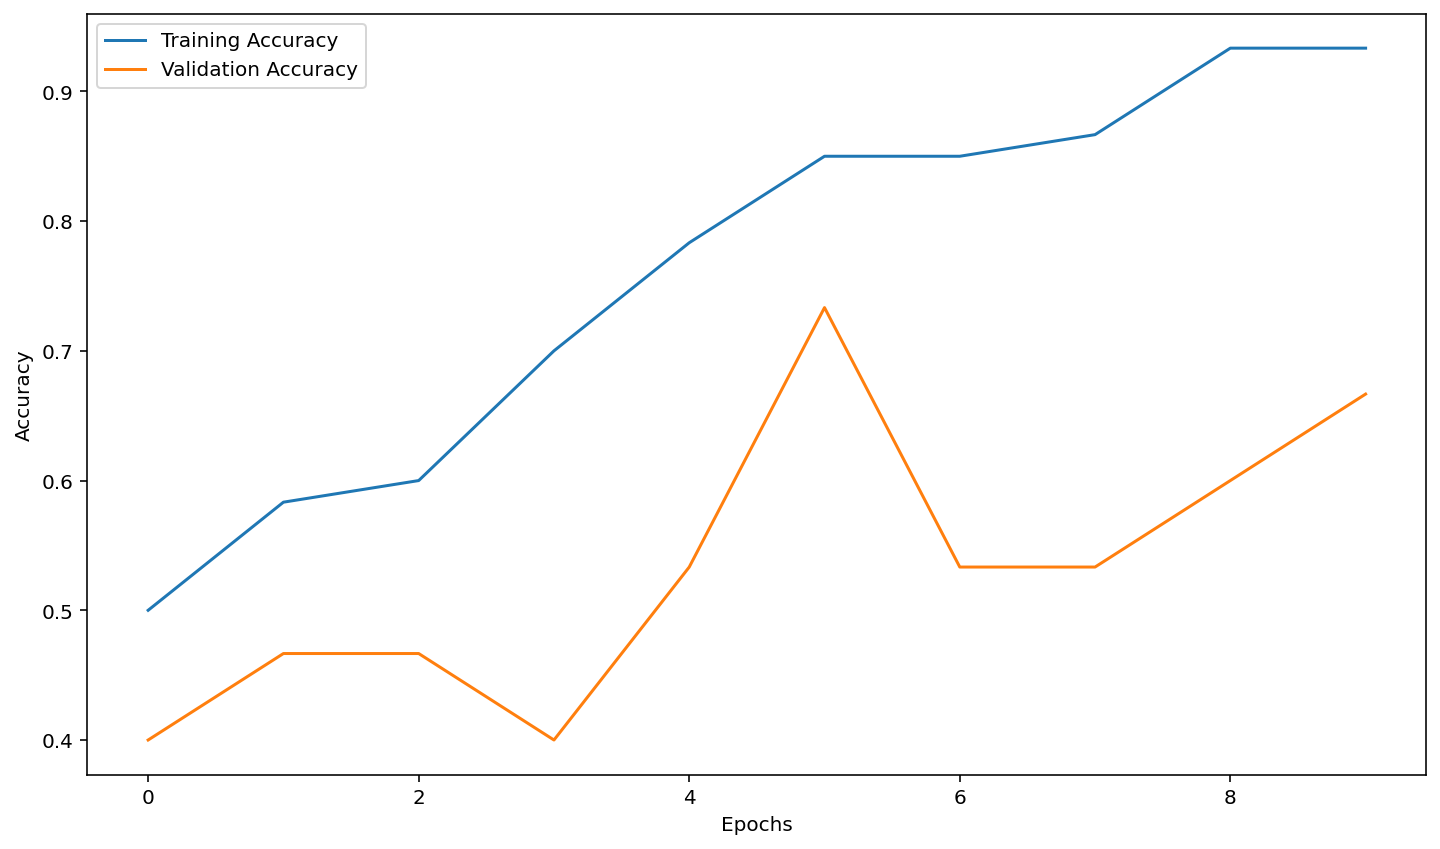

In [12]:
## since we have access to the progress, why not visualize it!

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Okay but we need to evaluate the model on some test data now!  

In [13]:
# Evaluate the model on test data (data not seen during training)
test_loss, test_acc = model.evaluate(test_X, test_y)
print(f'Test Accuracy: {test_acc}')

1/1 [==============================] - ETA: 0s - loss: 0.5079 - accuracy: 0.8800

1/1 [==============================] - 0s 87ms/step - loss: 0.5079 - accuracy: 0.8800


Test Accuracy: 0.8799999952316284


### We're almost done, but not yet!  
We've trained this wonderful model that gives good predictions - we don't want to have to retrain the model each time we want to make a new prediction. We should be able to save the weights and biases of our model so that we can come back to it with new data at a later time and not be worried about having to train it again (realistically speaking, training the model each time isn't usually feasible - you might have spent hours or even days training it, you might not have the same amount of time available next time). Luckily, Keras let's us do this too.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


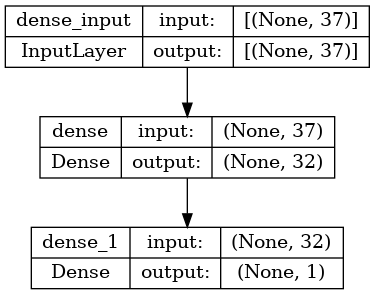

In [14]:
# Save the model
model.save('my_model.h5')

# Visualize the model architecture
plot_model(model, to_file='my_model.png', show_shapes=True)


This is great! Now we have our model saved in `my_model.h5` so we can load it into our script or jupyter notebook or wherever when we need it and also the plotting let's us actually see the architecture of our model (very useful for reports and presentations - doesn't this take the load off of you little bit of creating a visualization of your model?).  



Now we're done! Keras has a lot of utility and one of the best things about it is that you don't need to be an advanced coder to get started with it. However, with its ease, come limitations. If you are an advanced coder and you want to do something really fancy - create some really niche layers or architecture, unfortunately Keras might not be able to help you there (as far as I know!). You would need to turn to either `tensorflow` or `PyTorch` to create those really cool and novel models but in order to make use of them, you need to become familiar with [Object Oriented Programming in Python](https://realpython.com/python3-object-oriented-programming/). Happy ML coding!